In [27]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap
import numpy
import torch
from torchvision import transforms
from urllib.request import urlopen
from urllib.error import URLError
from PIL import Image


In [28]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

print(X.shape)


(50, 224, 224, 3)


RGB image of size (683, 683)


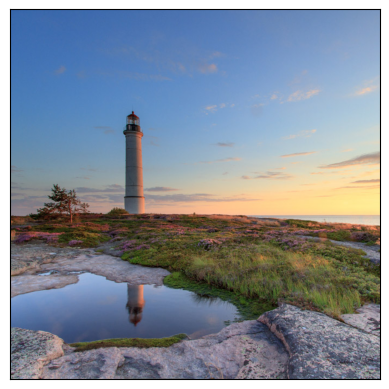

<class 'numpy.ndarray'>
(1, 224, 224, 3)


In [29]:
from urllib.request import urlopen
from urllib.error import URLError
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image

image_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_original.jpg?raw=true'


try:
    with Image.open(urlopen(image_url)) as im:
        # The following fixes some problems when loading images:
        # https://stackoverflow.com/a/64598016
        image = im.convert("RGB")
except (URLError, OSError):
    print("please provide a valid URL or local path")
else:    
    print(f"{image.mode} image of size {image.size}")
    plt.imshow(np.asarray(image))
    plt.xticks([])
    plt.yticks([])
    plt.show()

def pil_image_to_resnet50_input(pil_image):
    # Resizing the image to the required dimensions for ResNet50 (224 x 224)
    img_resized = pil_image.resize((224, 224))

    # Converting the PIL image to a NumPy array
    img_array = keras_image.img_to_array(img_resized)

    # Expanding the dimensions to be compatible with ResNet50 input shape (1, 224, 224, 3)
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Preprocessing the image using the built-in function for ResNet50 normalization
    #img_preprocessed = preprocess_input(img_array_expanded)

    return img_array_expanded

image = pil_image_to_resnet50_input(image)
print(type(image))
print(image.shape)

In [30]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [31]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", image[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(image, max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


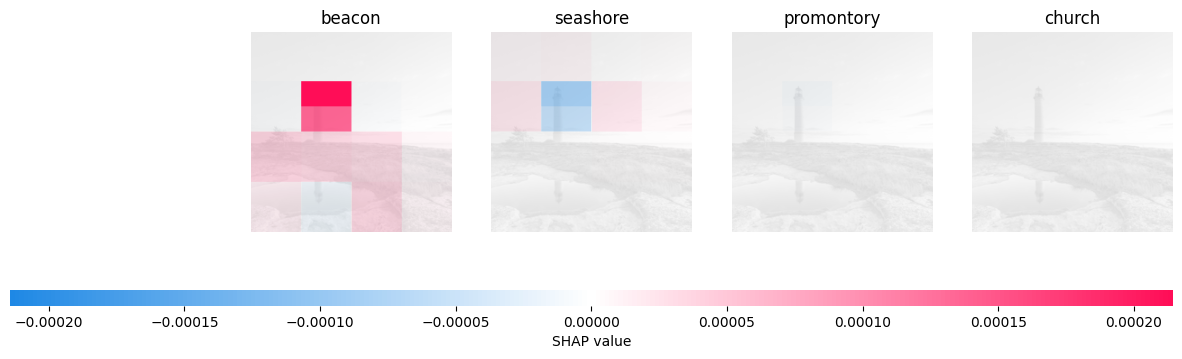

In [32]:
# output with shap values
shap.image_plot(shap_values)